In [1]:
import pandas as pd
import pickle
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('https://s3-us-west-2.amazonaws.com/pcadsassessment/parking_citations.corrupted.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [4]:
# Drop rows missing our output variable
df = dataset[dataset['Make'].notna()]

In [5]:
df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0
6,1106500452,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201605.0,NaN,MAZD,PA,BL,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,99999.0,99999.0
10,1106506424,2015-12-22T00:00:00,1100.0,NaN,NaN,CA,201511.0,NaN,FORD,TR,WH,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.0
11,1106506435,2015-12-22T00:00:00,1105.0,NaN,NaN,CA,201701.0,NaN,CHRY,PA,GO,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.0
14,1107179581,2015-12-27T00:00:00,1055.0,NaN,NaN,CA,201605.0,NaN,TOYO,PA,BK,3100 N HOLLYRIDGE DR,NaN,54.0,8058L,PREF PARKING,68.0,99999.0,99999.0


In [6]:
df.describe()

,Issue time,Marked Time,Plate Expiry Date,Agency,Fine amount,Latitude,Longitude
count,4.356549e+06,144922.000000,3.960997e+06,4.357538e+06,4.354349e+06,4.357543e+06,4.357543e+06
mean,1.203880e+03,1055.147196,1.867826e+05,5.203218e+01,7.010876e+01,5.503485e+06,1.587400e+06
std,4.722652e+02,227.166905,5.276190e+04,9.238550e+00,3.205594e+01,3.025596e+06,2.098413e+06
min,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+01,9.999900e+04,9.999900e+04
25%,9.120000e+02,910.000000,2.016010e+05,5.100000e+01,6.300000e+01,6.421524e+06,1.821596e+06
50%,1.155000e+03,1036.000000,2.017020e+05,5.400000e+01,6.800000e+01,6.451586e+06,1.841993e+06
75%,1.511000e+03,1200.000000,2.018030e+05,5.500000e+01,7.300000e+01,6.475013e+06,1.858208e+06
max,2.359000e+03,2400.000000,5.015120e+05,9.700000e+01,5.050000e+02,4.042322e+09,4.042322e+09


In [7]:
df.count()

Ticket number            4357544
Issue Date               4357544
Issue time               4356549
Meter Id                 1133849
Marked Time               144922
RP State Plate           4357153
Plate Expiry Date        3960997
VIN                         8142
Make                     4357544
Body Style               4353554
Color                    4356030
Location                 4357395
Route                    4325867
Agency                   4357538
Violation code           4357544
Violation Description    4357113
Fine amount              4354349
Latitude                 4357543
Longitude                4357543
dtype: int64

In [21]:
# Let's cut down the rows so we can make this usable in our slow environment
df = df.sample(100000, random_state=42)

ValueError: ignored

In [9]:
df.count()

Ticket number            100000
Issue Date               100000
Issue time                99976
Meter Id                  25705
Marked Time                3287
RP State Plate            99993
Plate Expiry Date         91003
VIN                         184
Make                     100000
Body Style                99916
Color                     99968
Location                  99999
Route                     99263
Agency                   100000
Violation code           100000
Violation Description     99988
Fine amount               99925
Latitude                 100000
Longitude                100000
dtype: int64

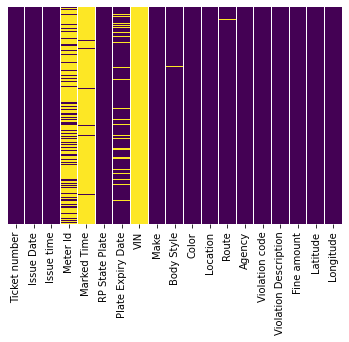

In [10]:
# Let's look at our NULL values
# Meter Id, Marked Time, VIN will not be useful (too many NULL values).
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
# Drop rows with too much NA data
df.drop(['Meter Id', 'Marked Time', 'VIN'], axis=1, inplace=True)

In [12]:
df.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
6904451,4325500476,2018-02-03T00:00:00,1653.0,CA,201711.0,BMW,PA,GY,800 LA CIENEGA BL N,00490,54.0,88.13B+,METER EXP.,63.0,6.447674e+06,1.853642e+06
2139100,1109405636,2015-05-22T00:00:00,908.0,CA,201506.0,VOLK,PA,SI,1715 N COMMONWEALTH,00448,54.0,8069BS,NO PARK/STREET CLEAN,73.0,6.475321e+06,1.859647e+06
3203228,4270563765,2015-11-17T00:00:00,1222.0,CA,201604.0,GMC,VN,GN,427 SOUTH GRAND VIEW STREET,00456,54.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.478206e+06,1.845287e+06
6809954,4324753370,2018-01-25T00:00:00,2010.0,AZ,NaN,FRHT,TK,WT,8240 HASKELL AVENUE,00317,53.0,80.69.2,COMM VEH OVER TIME LIMIT,78.0,6.418091e+06,1.902942e+06
3759566,4291409135,2016-09-15T00:00:00,2124.0,CA,201611.0,FORD,PA,MR,4327 KRAFT AVE,350R1,53.0,22500E,BLOCKING DRIVEWAY,68.0,6.446671e+06,1.876580e+06


In [13]:
# Let's remove all remaining NA values
df = df.dropna()

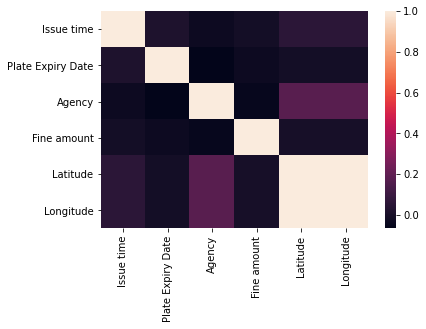

In [14]:
# Of our numeric data, correlations are not super exciting. But this is also not very surprising
# There might be something to agency and lat/long
corr = df.corr()
sns.heatmap(corr)

In [22]:
# Set our output var
y = df['Make']

# Choose features that require dummies
features = ['RP State Plate', 'Body Style', 'Color', 'Agency', 'Fine amount']

X = pd.get_dummies(df[features])

In [23]:
# Split our dataset into training/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [24]:
# Set up our Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1908987026954359
